In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_base = pd.read_csv('base.csv')
df_fuel = pd.read_csv('fuel.csv')

/var/folders/1l/mn29vnvd3lq7lf0nw2y08j400000gn/T/ipykernel_17639/2555271654.py:2: DtypeWarning: Columns (74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fuel = pd.read_csv('fuel.csv')


In [3]:
df_base.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df_fuel.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [6]:
# Keep only the relevant columns from df_fuel
df_fuel = df_fuel[['make', 'model', 'comb08']]


Fist we standardize the names since df_base uses "Manufacturer", "Model" and df_fuel uses "make", "model" and "comb08". To maximize the matches between the dfs, we clean the model and manufacturing names, and then merge on both columns, ensuring we keep only *comb08* from df_fuel so that each row in df_base has a value.

In [7]:
df_fuel = df_fuel.rename(columns={
    'make': 'Brand',
    'model': 'Model',
    'comb08': 'Fuel Efficiency'
})

df_base = df_base.rename(columns={
    'Manufacturer': 'Brand',
    'Prod. year': 'Year'
})

In [8]:
def clean_text(df, column):
    return df[column].str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)

df_base['Brand'] = clean_text(df_base, 'Brand')
df_base['Model'] = clean_text(df_base, 'Model')
df_fuel['Brand'] = clean_text(df_fuel, 'Brand')
df_fuel['Model'] = clean_text(df_fuel, 'Model')

In [9]:
df_fuel_unique = df_fuel.groupby(["Brand", "Model"])["Fuel Efficiency"].mean().reset_index() #in df_fuel, each model has multiple FE values, so we average it
df_base = df_base.merge(df_fuel_unique, on=["Brand", "Model"], how="left")

In [10]:
df_base = df_base.dropna(subset=['Fuel Efficiency'])

In [11]:

df_base.to_csv('cleaned_merged_vehicles.csv', index=False)

In [12]:
print(df_base['Brand'].value_counts())

toyota           2516
hyundai          2247
honda             794
lexus             728
chevrolet         682
ford              515
volkswagen        443
bmw               388
kia               288
nissan            239
audi              224
daewoo             85
dodge              60
suzuki             55
porsche            53
fiat               48
subaru             45
jaguar             36
land rover         30
chrysler           24
mazda              23
mitsubishi         20
mini               18
buick              15
cadillac           12
infiniti           12
acura              11
volvo              10
scion               6
mercedes-benz       6
lincoln             5
maserati            4
rolls-royce         2
bentley             2
isuzu               2
pontiac             1
mercury             1
lamborghini         1
tesla               1
aston martin        1
Name: Brand, dtype: int64


In [13]:
print("Number of vehicles by model:")
print(df_base['Model'].value_counts()) #there are still a lot of individual prius models, so maybe merge df_fuel and df_base on year as well

Number of vehicles by model:
prius       1083
sonata      1079
camry        938
elantra      922
fit          446
            ... 
amg gt s       1
s80            1
rs6            1
370z           1
xe             1
Name: Model, Length: 237, dtype: int64


Assuming we have a database called TBD with two tables "Cars" and "Fuel Efficiency per Car" (here df_base ad df_fuel), we can SQL query the above performed merging and joining of the database as follows:

```sql
SELECT c.*, f.comb08
FROM df_base c
INNER JOIN df_fuel f
    ON LOWER(TRIM(REGEXP_REPLACE(c.Manufacturer, '\s+', ' '))) = 
       LOWER(TRIM(REGEXP_REPLACE(f.Manufacturer, '\s+', ' ')))
    AND LOWER(TRIM(REGEXP_REPLACE(c.Model, '\s+', ' '))) = 
        LOWER(TRIM(REGEXP_REPLACE(f.Model, '\s+', ' ')));

Here we run some basic statistics so we understand our data a bit better:

In [14]:
print("Most Popular Car Categories:")
print(df_base['Category'].value_counts().head())

efficiency_by_category = df_base.groupby('Category')['Fuel Efficiency'].mean().sort_values(ascending=False)
print("\nAverage Fuel Efficiency by Category:")
print(efficiency_by_category)

print("\nDistribution of Fuel Types:")
print(df_base['Fuel type'].value_counts())

hybrid_stats = df_base.groupby('Fuel type')['Fuel Efficiency'].agg(['mean', 'count'])
print("\nAverage Fuel Efficiency by Fuel Type:")
print(hybrid_stats)

Most Popular Car Categories:
Sedan        5936
Hatchback    1819
Jeep         1482
Coupe         262
Universal      56
Name: Category, dtype: int64

Average Fuel Efficiency by Category:
Category
Hatchback      39.871500
Universal      29.500293
Sedan          27.053555
Coupe          23.111806
Goods wagon    22.995062
Minivan        21.063625
Jeep           20.957746
Cabriolet      20.138988
Limousine      18.411915
Name: Fuel Efficiency, dtype: float64

Distribution of Fuel Types:
Petrol            5459
Hybrid            2822
LPG                687
Diesel             532
CNG                 92
Plug-in Hybrid      60
Hydrogen             1
Name: Fuel type, dtype: int64

Average Fuel Efficiency by Fuel Type:
                     mean  count
Fuel type                       
CNG             22.233554     92
Diesel          21.719577    532
Hybrid          36.100605   2822
Hydrogen        41.800000      1
LPG             24.481321    687
Petrol          25.531965   5459
Plug-in Hybrid  37.

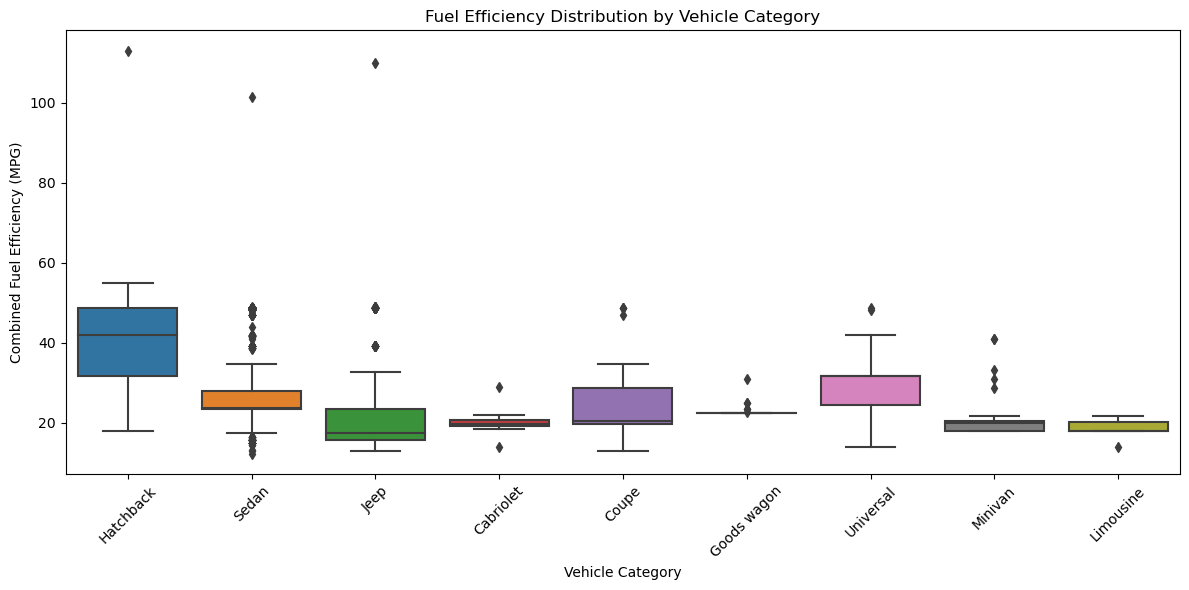

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_base, x='Category', y='Fuel Efficiency')
plt.xticks(rotation=45)
plt.title('Fuel Efficiency Distribution by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Combined Fuel Efficiency (MPG)')
plt.tight_layout()
plt.show()      

Now we filter our data so that we only have car models that are from years 2018 and earlier and remove the prices for the cars that are from years 2009 and earlier.

In [16]:
df_filtered = df_base[df_base['Year'] < 2019].copy()
df_filtered.loc[df_filtered['Year'] < 2010, 'Price'] = None 

Next, we fill all missing values and add an additional column to identify those.

In [17]:
df_filtered.fillna("Missing!!!", inplace=True)

df_filtered["Error"] = df_filtered.apply(lambda row: "Missing Value" if "Missing!!!" in row.values else "", axis=1)


Here we do the grouping and aggregation to obtain the average price of each brand.

In [18]:
df_filtered["Price"] = pd.to_numeric(df_filtered["Price"], errors="coerce")

brand_avg_price = df_filtered.groupby("Brand")["Price"].mean()
print(brand_avg_price)

Brand
acura              4065.545455
aston martin               NaN
audi              13590.314917
bentley          197574.500000
bmw               21875.760956
buick             12701.250000
cadillac           9094.625000
chevrolet         14226.522907
chrysler           6809.928571
daewoo             7995.857143
dodge              8588.760870
fiat              10145.680851
ford              13325.267782
honda             17986.606618
hyundai           15446.104705
infiniti          27068.500000
isuzu                      NaN
jaguar            37529.586207
kia               15513.687943
land rover        69437.117647
lexus             21819.489633
lincoln             470.000000
maserati          17980.333333
mazda              3136.000000
mercedes-benz    297930.000000
mercury             941.000000
mini              13655.545455
mitsubishi         5555.428571
nissan            10653.767857
pontiac                    NaN
porsche           48095.894737
rolls-royce                NaN
sc

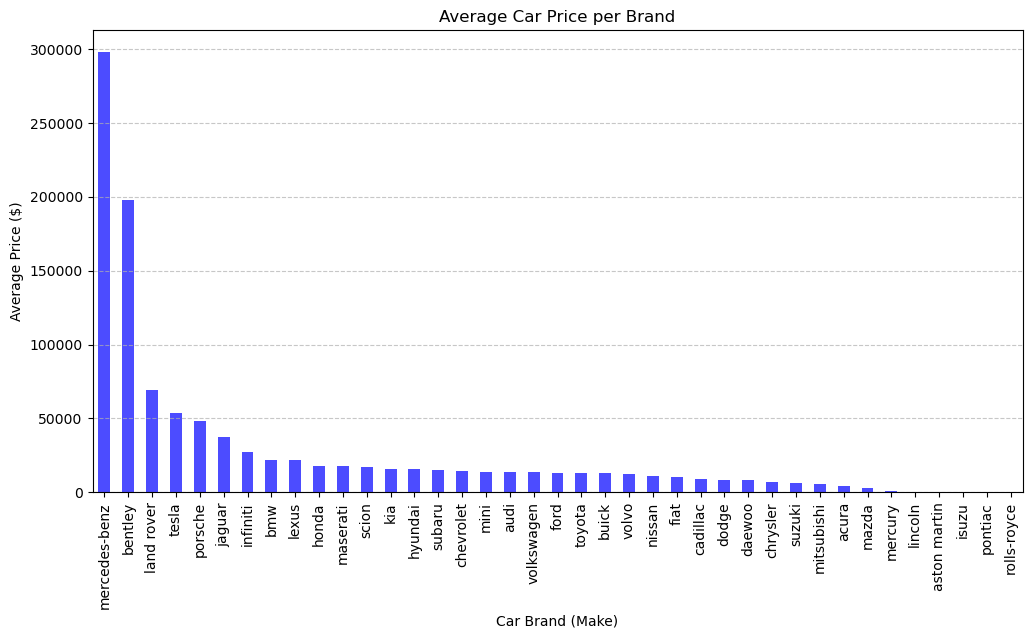

In [19]:
plt.figure(figsize=(12, 6))
brand_avg_price.sort_values(ascending=False).plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Car Brand (Make)")
plt.ylabel("Average Price ($)")
plt.title("Average Car Price per Brand")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Now we visualize the correlation between price and year.

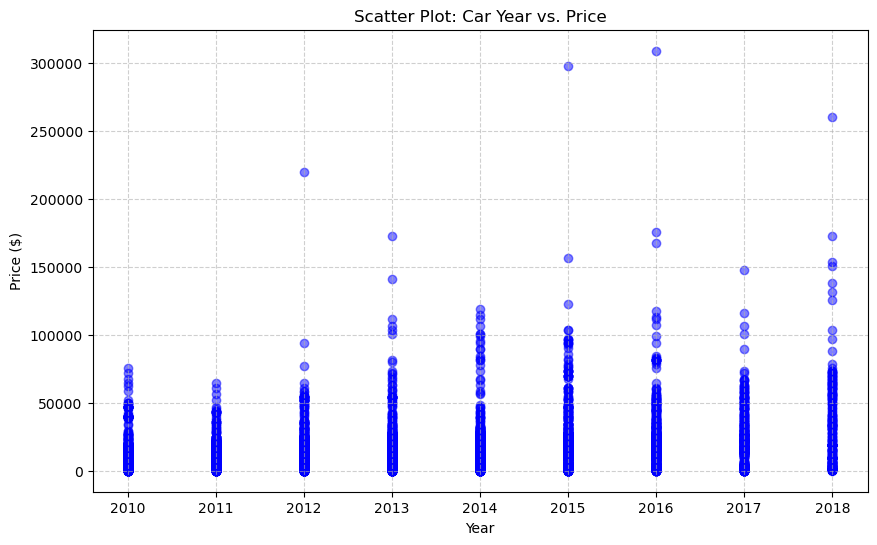

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered["Year"], df_filtered["Price"], alpha=0.5, color="blue")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.title("Scatter Plot: Car Year vs. Price")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Finally, we check the numebr of unique car models and manipulate our data to obtain the number of cars that are above a price threshold, which we define as luxury cars.

In [21]:
unique_models = df_filtered["Model"].nunique()
print(f"Total Unique Car Models: {unique_models}")

luxury_threshold = 100000  #not sure what constitutes luxury

df_filtered["IsLuxury"] = df_filtered["Price"].apply(lambda x: True if x > luxury_threshold else False)

luxury_count = df_filtered["IsLuxury"].sum()
print(f"Number of Luxury Cars (Price > ${luxury_threshold}): {luxury_count}")


Total Unique Car Models: 234
Number of Luxury Cars (Price > $100000): 37
